<img src="img/banner_bioudea.png">

# Práctica 

### Clasificación Fashion-MNIST

Crearemos un modelo de clasificación para el conjunto de datos <a href="https://github.com/zalandoresearch/fashion-mnist" target="_blank">Fashion-MNIST dataset</a>. MNIST es una base de datos bastante sencilla, ya que con las redes neuronales puede lograr fácilmente una precisión superior al 97%. Fashion-MNIST es un conjunto de imágenes de ropa en escala de grises de 28x28. Es más complejo que MNIST, por lo que es una mejor representación del rendimiento real de su red.

#### Se importan las librerías de interés

In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Descargamos la base de datos desde keras

In [ ]:
!pip install keras

In [ ]:
!pip install keras.datasets

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Veamos un ejemplo de las imágenes que vamos a trabajar

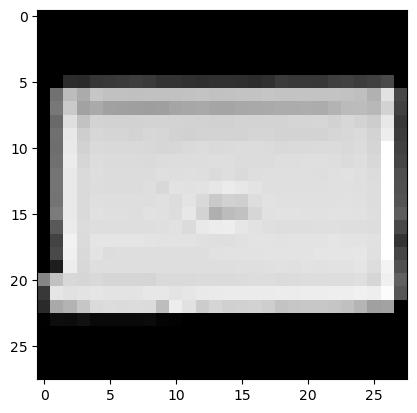

In [4]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

In [9]:
from PIL import Image
# Seleccionar una imagen de ejemplo
example_image = x_test[2]  # Cambia el índice para obtener otras imágenes

# Guardar la imagen como PNG
pil_image = Image.fromarray(example_image)
pil_image.save('fashion_mnist_example3.png')

In [6]:
from keras import utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1] #Datos de entrada a la RNA

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# Se convierte la lista de etiquetas a una matriz de clase binaria
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

In [11]:
print("Tamaño de las imágenes (28x28) según la descripción del dataset: ",28*28)
print("La dimensión de la entrada (x) a la red: ", input_dim)

Tamaño de las imágenes (28x28) según la descripción del dataset:  784
La dimensión de la entrada (x) a la red:  784


In [12]:
print("Ejemplo de la salida: ")
y_trainOHE[0]

Ejemplo de la salida: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Definir la arquitectura de la red 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


o

In [17]:
del model # se borra la variable model 
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

# or instantiate an optimizer before passing it to model.compile
#sgd = tf.keras.optimizers.SGD( decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd')

#### Entrenamiento

In [26]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 3s - loss: 0.5571 - val_loss: 0.4255 - 3s/epoch - 1ms/step
Epoch 2/10
3375/3375 - 3s - loss: 0.3921 - val_loss: 0.3810 - 3s/epoch - 958us/step
Epoch 3/10
3375/3375 - 3s - loss: 0.3522 - val_loss: 0.3683 - 3s/epoch - 982us/step
Epoch 4/10
3375/3375 - 3s - loss: 0.3255 - val_loss: 0.3608 - 3s/epoch - 936us/step
Epoch 5/10
3375/3375 - 3s - loss: 0.3061 - val_loss: 0.3543 - 3s/epoch - 978us/step
Epoch 6/10
3375/3375 - 4s - loss: 0.2895 - val_loss: 0.3418 - 4s/epoch - 1ms/step
Epoch 7/10
3375/3375 - 4s - loss: 0.2747 - val_loss: 0.3417 - 4s/epoch - 1ms/step
Epoch 8/10
3375/3375 - 4s - loss: 0.2619 - val_loss: 0.3382 - 4s/epoch - 1ms/step
Epoch 9/10
3375/3375 - 4s - loss: 0.2506 - val_loss: 0.3345 - 4s/epoch - 1ms/step
Epoch 10/10
3375/3375 - 5s - loss: 0.2399 - val_loss: 0.3357 - 5s/epoch - 1ms/step


Generating test predictions...


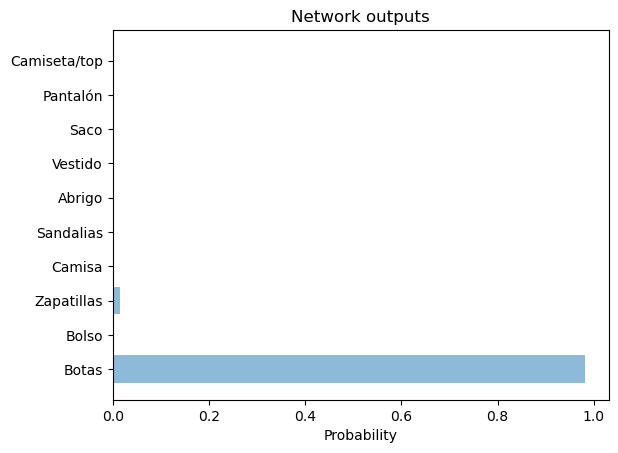

In [27]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [28]:
preds = model.predict(X_testN, verbose=0)
classes_x=np.argmax(preds,axis=1)
classes_x

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [29]:
preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  87.16000000000001 %


In [30]:
model.save('fashion_mnist_model.h5')

In [31]:
import tensorflow

In [36]:
! pip show pillow

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: c:\users\asv\anaconda3\lib\site-packages
Requires: 
Required-by: bokeh, datashader, imageio, matplotlib, scikit-image


In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np

# Cargar datos FASHION MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Crear el modelo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Guardar el modelo
model.save('fashion_mnist_model2.h5')

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3871 - accuracy: 0.8631 - val_loss: 0.3201 - val_accuracy: 0.8841
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2623 - accuracy: 0.9033 - val_loss: 0.2698 - val_accuracy: 0.9004
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2167 - accuracy: 0.9204 - val_loss: 0.2564 - val_accuracy: 0.9078
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1851 - accuracy: 0.9311 - val_loss: 0.2567 - val_accuracy: 0.9058
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1564 - accuracy: 0.9427 - val_loss: 0.2516 - val_accuracy: 0.9169
